**Contributions**

**Braden Switzer:**
* Merge and clean data
* Linear regression model
* Ridge regression model
* Presentation

**Gary Wang:**
* Find central tendencies, find ranking changes, visualize relationships, find features that contribute to happiness
* K-nearest neighbors model
* Own formula to calculate happiness score
* Model comparison/performance

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import spearmanr

Made pandas dataframe from 2015 set

In [3]:
cl15 = pd.read_csv("data/2015.csv")

Dropped columns not common to the rest of the sets

In [4]:
cl15 = cl15.drop(columns=['Region'])
cl15 = cl15.drop(columns=['Dystopia Residual'])
cl15 = cl15.drop(columns=['Standard Error'])

Displayed statistics to check for missing/incompatible values

In [5]:
cl15.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880


2016 Set

In [6]:
cl16 = pd.read_csv("data/2016.csv")

Dropped columns not common to the rest of the sets

In [7]:
cl16 = cl16.drop(columns=['Region'])
cl16 = cl16.drop(columns=['Dystopia Residual'])
cl16 = cl16.drop(columns=['Lower Confidence Interval'])
cl16 = cl16.drop(columns=['Upper Confidence Interval'])

2016 Stats

In [8]:
cl16.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000,157.000000
mean,78.980892,5.382185,0.953880,0.793621,0.557619,0.370994,0.137624,0.242635
std,45.466030,1.141674,0.412595,0.266706,0.229349,0.145507,0.111038,0.133756
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,4.404000,0.670240,0.641840,0.382910,0.257480,0.061260,0.154570
50%,79.000000,5.314000,1.027800,0.841420,0.596590,0.397470,0.105470,0.222450
75%,118.000000,6.269000,1.279640,1.021520,0.729930,0.484530,0.175540,0.311850
max,157.000000,7.526000,1.824270,1.183260,0.952770,0.608480,0.505210,0.819710


2017 Set

In [9]:
cl17 = pd.read_csv("data/2017.csv")

Dropped columns not common to the rest of the sets

In [10]:
cl17 = cl17.drop(columns=['Dystopia.Residual'])
cl17 = cl17.drop(columns=['Whisker.low'])
cl17 = cl17.drop(columns=['Whisker.high'])

Processing the column names and reformatting the order of the columns so that each set is exactly the same structurally.

In [11]:
cl17 = cl17.rename(columns={'Happiness.Rank' : 'Happiness Rank', 'Happiness.Score' : 'Happiness Score',
                            'Economy..GDP.per.Capita.' : 'Economy (GDP per Capita)', 'Health..Life.Expectancy.' : 'Health (Life Expectancy)',
                            'Trust..Government.Corruption.' : 'Trust (Government Corruption)'})
cl17 = cl17[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
             'Trust (Government Corruption)', 'Generosity']]

2017 Stats

In [12]:
cl17.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,0.984718,1.188898,0.551341,0.408786,0.123120,0.246883
std,44.888751,1.131230,0.420793,0.287263,0.237073,0.149997,0.101661,0.134780
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.500000,4.505500,0.663371,1.042635,0.369866,0.303677,0.057271,0.154106
50%,78.000000,5.279000,1.064578,1.253918,0.606042,0.437454,0.089848,0.231538
75%,116.500000,6.101500,1.318027,1.414316,0.723008,0.516561,0.153296,0.323762
max,155.000000,7.537000,1.870766,1.610574,0.949492,0.658249,0.464308,0.838075


2018 Set

In [13]:
cl18 = pd.read_csv("data/2018.csv")

Processing names

In [14]:
cl18 = cl18.rename(columns={'Country or region' : 'Country', 'Overall rank' : 'Happiness Rank', 'Score' : 'Happiness Score',
                            'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                            'Healthy life expectancy' : 'Health (Life Expectancy)', 'Freedom to make life choices' : 'Freedom',
                            'Perceptions of corruption' : 'Trust (Government Corruption)'})

Reformatting column order

In [15]:
cl18 = cl18[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
             'Trust (Government Corruption)', 'Generosity']]

2018 Stats

In [16]:
cl18.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000
mean,78.500000,5.375917,0.891449,1.213237,0.597346,0.454506,0.112000,0.181006
std,45.177428,1.119506,0.391921,0.302372,0.247579,0.162424,0.096492,0.098471
min,1.000000,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.453750,0.616250,1.066750,0.422250,0.356000,0.051000,0.109500
50%,78.500000,5.378000,0.949500,1.255000,0.644000,0.487000,0.082000,0.174000
75%,117.250000,6.168500,1.197750,1.463000,0.777250,0.578500,0.137000,0.239000
max,156.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.457000,0.598000


Uploading, cleaning, reformatting and displaying stats for the 2019 set

In [17]:
cl19 = pd.read_csv("data/2019.csv")
cl19 = cl19.rename(columns={'Country or region' : 'Country', 'Overall rank' : 'Rank', 'Score' : 'Happiness Score',
                            'GDP per capita' : 'Economy (GDP per Capita)', 'Social support' : 'Family',
                            'Healthy life expectancy' : 'Health (Life Expectancy)', 'Freedom to make life choices' : 'Freedom',
                            'Perceptions of corruption' : 'Trust (Government Corruption)'})
cl19 = cl19[['Country', 'Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom',
             'Trust (Government Corruption)', 'Generosity']]
cl19.describe()

,Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.110603,0.184846
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.094538,0.095254
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.047000,0.108750
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.085500,0.177500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.141250,0.248250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.453000,0.566000


Adding a column, "Year", to each of the sets pre-2019 with so that once I merge them, they will all be retraceable to their original year (Won't be used, but helpful to be able to track rows)

In [18]:
cl15['Year'] = 2015
cl16['Year'] = 2016
cl17['Year'] = 2017
cl18['Year'] = 2018

Concatenated/merged all of the dataframes, but once I used describe, I found that the UAE lacks a Trust entry in 2018, so I imputated by mean (0.38583 (2015), 0.35561 (2016), 0.324489563703537 (2017) ~ Mean: 0.3553098546).

In [19]:
tot = pd.concat([cl15, cl16, cl17, cl18], ignore_index=True)
tot.loc[(tot['Country'] == 'United Arab Emirates') & (tot['Trust (Government Corruption)'].isna()), 'Trust (Government Corruption)'] = 0.3553098546
tot.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,78.747604,5.372021,0.918764,1.045891,0.584299,0.415706,0.129499,0.226981,2016.493610
std,45.219609,1.131774,0.409808,0.328946,0.241948,0.154943,0.108492,0.126854,1.120339
min,1.000000,2.693000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000
25%,40.000000,4.497750,0.606755,0.847945,0.404143,0.310500,0.056616,0.137263,2015.000000
50%,79.000000,5.307000,0.983705,1.081274,0.632553,0.434635,0.094095,0.208581,2016.000000
75%,118.000000,6.187250,1.239502,1.283387,0.772957,0.538998,0.161593,0.290915,2017.000000
max,158.000000,7.632000,2.096000,1.644000,1.030000,0.724000,0.551910,0.838075,2018.000000


I added a new cumulative "Rank" column based off of "Happiness Score", sorted the set based off of them, and dropped their original ranks

In [20]:
tot["Rank"] = tot["Happiness Score"].rank(ascending=False)
tot = tot.sort_values("Rank")
tot = tot.drop(columns = ["Happiness Rank"])
tot.tail()

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Year,Rank
314,Burundi,2.905,0.068310,0.234420,0.157470,0.043200,0.094190,0.202900,2016,622.0
156,Burundi,2.905,0.015300,0.415870,0.223960,0.118500,0.100620,0.197270,2015,622.0
468,Burundi,2.905,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,2017,624.0
157,Togo,2.839,0.208680,0.139950,0.284430,0.364530,0.107310,0.166810,2015,625.0
469,Central African Republic,2.693,0.000000,0.000000,0.018773,0.270842,0.056565,0.280876,2017,626.0


          mean  median       std
Year                            
2015  5.375734  5.2325  1.145010
2016  5.382185  5.3140  1.141674
2017  5.354019  5.2790  1.131230
2018  5.375917  5.3780  1.119506


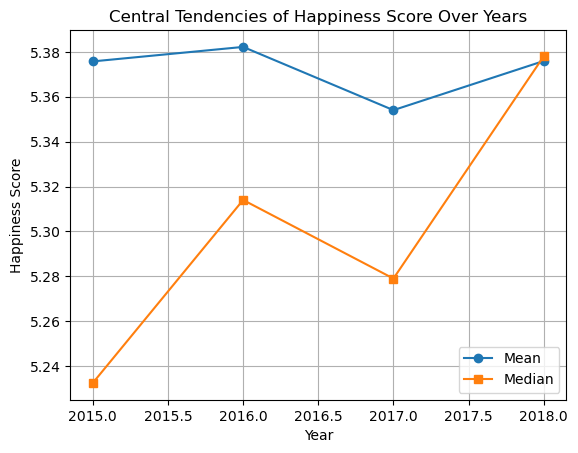

In [21]:
# What are the central tendencies of happiness score over the years? Did they increase or decrease?

# central tendency by year
year_stats = tot.groupby("Year")["Happiness Score"].agg(["mean", "median", "std"])
print(year_stats)

# plot mean and median happiness score over years
plt.plot(year_stats.index, year_stats["mean"], marker="o", label="Mean")
plt.plot(year_stats.index, year_stats["median"], marker="s", label="Median")
plt.title("Central Tendencies of Happiness Score Over Years")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.legend()
plt.grid(True)
plt.show()

Across 2015–2018, the mean happiness scores remain very stable, fluctuating within a small range (about 0.03). There is no major upward or downward trend.

The median happiness scores on the other hand, shows a slight upward trend. This suggests that while the overall average stayed stable, the typical middle country became slightly happier, hinting that improvements may be more concentrated among countries in the middle of the distribution rather than at the extremes.

The standard deviation decreases slightly each year, meaning the distribution becomes slightly more uniform, with countries becoming a bit closer together in happiness.

In [22]:
# Which countries have stable rankings over the years? Which countries improved their rankings?

# create pivot table of ranks per year
rank_pivot = tot.pivot_table(values="Rank", index="Country", columns="Year")

# calculate rank change (end year - start year)
rank_pivot["Rank_change"] = rank_pivot[tot["Year"].max()] - rank_pivot[tot["Year"].min()]
print(rank_pivot.head())

# I consider a difference of 5 or less ranks to be stable. You can change the numbers below if you would like a different difference.

# countries with stable rankings (small change)
stable_countries = rank_pivot[rank_pivot["Rank_change"].abs() <= 5]
print("Stable countries:\n", stable_countries.index.tolist())

# countries that improved (negative change means rank got better)
improving_countries = rank_pivot[rank_pivot["Rank_change"] < -5]
print("Improving countries:\n", improving_countries.index.tolist())

# countries that worsened
declining_countries = rank_pivot[rank_pivot["Rank_change"] > 5]
print("Declining countries:\n", declining_countries.index.tolist())

Year          2015   2016   2017   2018  Rank_change
Country                                             
Afghanistan  599.0  611.0  571.0  589.0        -10.0
Albania      393.0  437.0  438.0  448.0         55.0
Algeria      270.0  142.0  218.0  316.0         46.0
Angola       543.0  562.0  569.0  570.0         27.0
Argentina    104.0   94.0  100.0  131.0         27.0
Stable countries:
 ['Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium', 'Burundi', 'Denmark', 'Ecuador', 'El Salvador', 'Hong Kong', 'Iran', 'Ireland', 'Kenya', 'Luxembourg', 'Myanmar', 'Netherlands', 'Palestinian Territories', 'Rwanda', 'Spain']
Improving countries:
 ['Afghanistan', 'Bahrain', 'Benin', 'Bosnia and Herzegovina', 'Bulgaria', 'Burkina Faso', 'Cambodia', 'Cameroon', 'Chad', 'China', 'Congo (Brazzaville)', 'Cyprus', 'Czech Republic', 'Dominican Republic', 'Egypt', 'Estonia', 'Finland', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Honduras', 'Hungary', 'Italy', 'Ivory Coast

To find the most improved and most deteriorated countries as far as rank change

In [23]:
up = rank_pivot["Rank_change"].idxmin()
down = rank_pivot["Rank_change"].idxmax()
print("Most Improved:", up)
print("Most Deteriorated:", down)

Most Improved: Latvia
Most Deteriorated: Venezuela


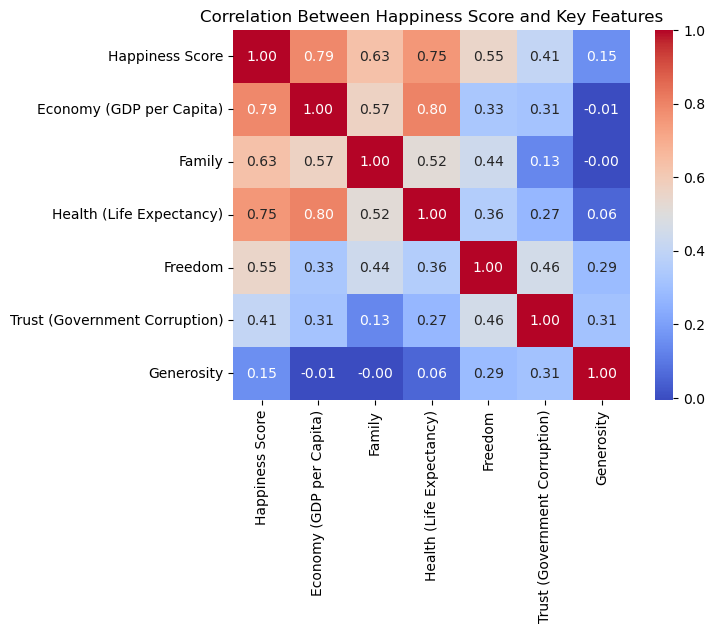

In [24]:
# Visualize the relationship between happiness score and other features such as GDP, social support, freedom, etc.

# I will be using a heatmap to show the correlation between happiness score and the other features

# select only the core numeric features
features = ["Happiness Score", "Economy (GDP per Capita)", "Family", "Health (Life Expectancy)",
            "Freedom", "Trust (Government Corruption)", "Generosity"]

corr = tot[features].corr()

sb.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Happiness Score and Key Features")
plt.show()

**Find out what features contribute to happiness. If you are the president of a country, what would you do to make citizens happier?**

Economy (GDP per capita) shows the strongest correlation (0.79) with happiness, indicating that higher economic output is strongly associated with higher happiness.

Healthy life expectancy also correlates strongly (0.75), suggesting that health outcomes significantly influence well-being.

Family has a moderately strong correlation (0.63), showing that people with stronger support networks tend to be happier.

Freedom has a moderate correlation (0.55), meaning countries where people have more personal freedom tend to report higher happiness.

Trust (low corruption) has a weaker but still meaningful correlation (0.41). Lower corruption is associated with higher happiness.

Generosity is only weakly related (0.15), indicating it contributes the least among the measured features.

If I were the president of a country, I would focus on improving the economy, making healthcare more accessible, and supporting programs that strengthen families and communities. I would also work to protect people's freedom to make choices, increase trust in the government by being more transparent, and encourage community involvement and helping others, since these actions could make citizens feel happier and more supported.

To begin models, 3 copies of the cleaned 2019 dataset were created in order to have modifiable dataframes for our new "Predicted" columns.

In [25]:
lrp19 = cl19.copy()
rrp19 = cl19.copy()
knn19 = cl19.copy()

The first model we chose was traditional linear regression, as we felt it would be a solid baseline model for the set; a model likely with a high bias and variability, but a decent predictive power for simple understanding nonetheless. Here, I grouped all of the targeted features in ftr_xscore, separated training sets by their x and y correlations for understanding of the I/O, performed standard linear regression using SciKit Learn, fitted with the training set (found statistics for correlation of existing features to existing "Happiness Score" values), and finally used the predict function to apply a prediction of "Happiness score" given the target features to be applied to the 2019 set.

In [26]:
ftr_xscore = ["Economy (GDP per Capita)", "Family", "Health (Life Expectancy)",
            "Freedom", "Trust (Government Corruption)", "Generosity"]

x_train = tot[ftr_xscore]
y_train = tot["Happiness Score"]
x_test = cl19[ftr_xscore]
y_test = cl19["Happiness Score"]

reg = LinearRegression().fit(x_train, y_train)

plr = reg.predict(x_test)

Here, I applied the predicted values into its own new column "Predicted Happiness Score", created another column, "Predicted Rank", that ranked by the new predicted scores, and finally standardized the structure as I had with the previous sets

In [27]:
lrp19["Predicted Happiness Score"] = plr
lrp19["Predicted Rank"] = lrp19["Predicted Happiness Score"].rank(ascending=False)
lrp19 = lrp19[['Country', 'Rank', 'Predicted Rank', 'Happiness Score', 'Predicted Happiness Score', 'Economy (GDP per Capita)', 'Family',
               'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]
lrp19.head()

,Country,Rank,Predicted Rank,Happiness Score,Predicted Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Finland,1,11.0,7.769,7.086500,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,2,4.0,7.600,7.198562,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,3,2.0,7.554,7.321012,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,4,13.0,7.494,7.059966,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,5,12.0,7.488,7.073638,1.396,1.522,0.999,0.557,0.298,0.322


Below is a representation of the predicted rank as opposed to the actual rank for our linear regression trained model. Sheerly from an eye value, it seems alright, but there is clearly some values that assumably the mean overfit, biased nature of standard linear regression causes to look extraneous. I believe that we could do better perhaps with the regularized values that a ridge regression model provides.

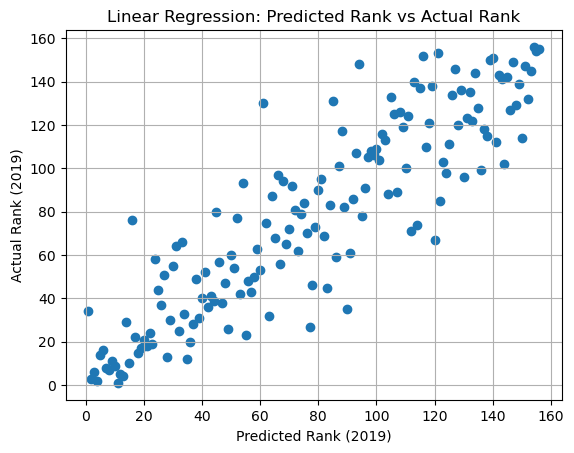

In [28]:
plt.scatter(lrp19["Predicted Rank"], lrp19["Rank"])
plt.xlabel("Predicted Rank (2019)")
plt.ylabel("Actual Rank (2019)")
plt.title("Linear Regression: Predicted Rank vs Actual Rank")
plt.grid(True)
plt.show()

Just for the sake of visualization, we made a scatter plot for happiness scores as well. The bulk of the data appears to be much more centralized, likely because of the difference of scales of error for both sets

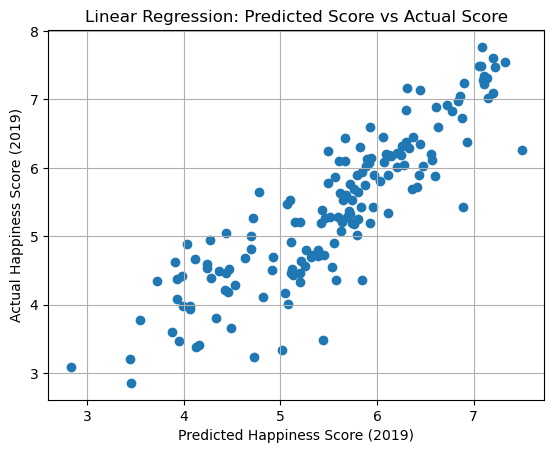

In [29]:
plt.scatter(lrp19["Predicted Happiness Score"], lrp19["Happiness Score"])
plt.xlabel("Predicted Happiness Score (2019)")
plt.ylabel("Actual Happiness Score (2019)")
plt.title("Linear Regression: Predicted Score vs Actual Score")
plt.grid(True)
plt.show()

Next we began the Ridge Regression model. Hopefully this model could be less overfit than the simple concept of minimizing residual sums by standardiing the magnitude. To do this, we began by initializing the scaler as "scl", fit the scaler to our previously processed train values (Found the standardization statisitics), and applied the fit to both the test and train sets using transform, performed a ridge regression with an (Initially arbitratily selected, but I one by one found the optimal value) alpha of 750, fitted the newly scaled x_train to the unscaled y, and finally used the regression to predict the 2019 values using its data, scaled.

In [30]:
scl = StandardScaler()
scl.fit(x_train)
xscl = scl.transform(x_train)
xtstscl = scl.transform(x_test)
rreg = Ridge(alpha=750).fit(xscl, y_train)

prr = rreg.predict(xtstscl)

Primed the copied 2019 set with the new predicted values and organized as I did with linear regression.

In [31]:
rrp19["Predicted Happiness Score"] = prr
rrp19["Predicted Rank"] = rrp19["Predicted Happiness Score"].rank(ascending=False)
rrp19 = rrp19[['Country', 'Rank', 'Predicted Rank', 'Happiness Score', 'Predicted Happiness Score', 'Economy (GDP per Capita)', 'Family',
               'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]

Finally, we plotted the values in a scatterplot, which by the naked eye, is almost unnoticeably different than the linear regression plot. After a further delve using the grid however, the points do seem slightly tighter (Less variance) than the linear regression model.

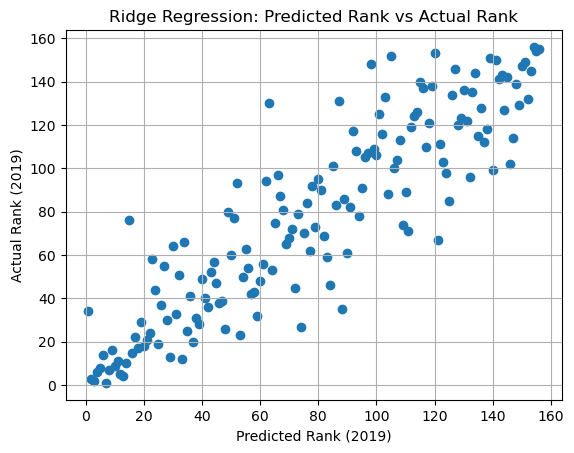

In [32]:
plt.scatter(rrp19["Predicted Rank"], rrp19["Rank"])
plt.xlabel("Predicted Rank (2019)")
plt.ylabel("Actual Rank (2019)")
plt.title("Ridge Regression: Predicted Rank vs Actual Rank")
plt.grid(True)
plt.show()


Score comparisons for the sake of consistency. This set is definitely more noticeably compact as compared to the rank plots

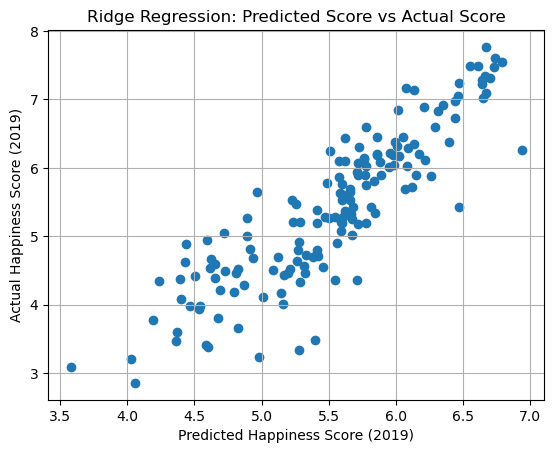

In [33]:
plt.scatter(rrp19["Predicted Happiness Score"], rrp19["Happiness Score"])
plt.xlabel("Predicted Happiness Score (2019)")
plt.ylabel("Actual Happiness Score (2019)")
plt.title("Ridge Regression: Predicted Score vs Actual Score")
plt.grid(True)
plt.show()

**K-Nearest Neighbors Model**

KNN regression estimates the value of a point based on the average of its k nearest neighbors in feature space. In our case, it predicts the happiness score of a country by looking at the scores of its nearest neighbors in terms of features like economy, family, and freedom. It basically assumes that countries with similar feature values will have similar happiness scores. You can also weigh closer neighbors more heavily, so nearby countries in feature space have a bigger impact on the prediction.

After testing parameters, I found that using the weights of distance give better results than uniform. In addition, using the 10 nearest neighbors gives better performance compared to numbers below or above it.

In [34]:
# K-Nearest Neighbors Model

# features, training data, testing data, and scaling already done in previous model's code

# KNN uses scaled data (same scaler as Ridge)
# uses 10 nearest neighbors to predict (closer neighbors have more influence)
knn = KNeighborsRegressor(n_neighbors=10, weights="distance")
knn.fit(xscl, y_train)

knn_pred = knn.predict(xtstscl)

knn19["Predicted Happiness Score"] = knn_pred
knn19["Predicted Rank"] = knn19["Predicted Happiness Score"].rank(ascending=False)
knn19 = knn19[['Country', 'Rank', 'Predicted Rank', 'Happiness Score', 'Predicted Happiness Score', 'Economy (GDP per Capita)', 'Family',
               'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]

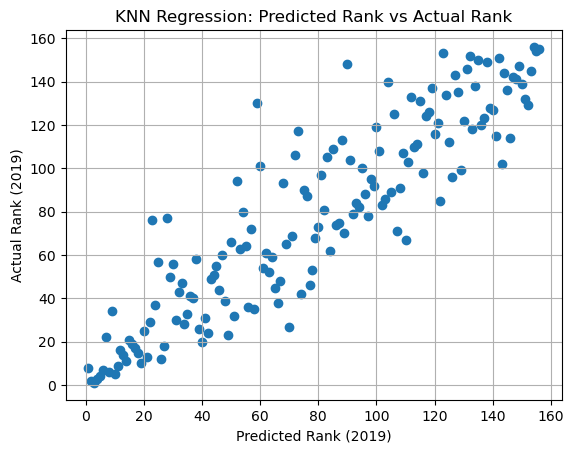

In [35]:
plt.scatter(knn19["Predicted Rank"], knn19["Rank"])
plt.xlabel("Predicted Rank (2019)")
plt.ylabel("Actual Rank (2019)")
plt.title("KNN Regression: Predicted Rank vs Actual Rank")
plt.grid(True)
plt.show()

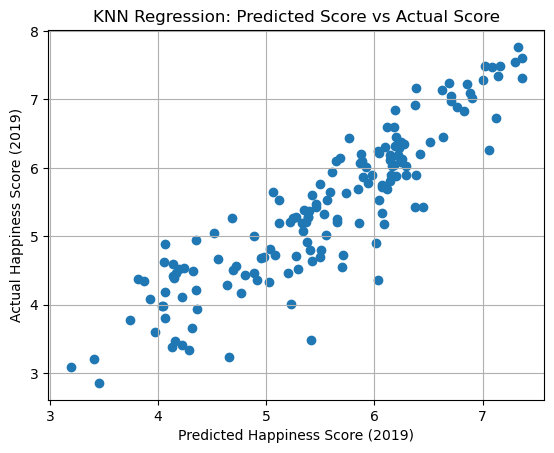

In [36]:
plt.scatter(knn19["Predicted Happiness Score"], knn19["Happiness Score"])
plt.xlabel("Predicted Happiness Score (2019)")
plt.ylabel("Actual Happiness Score (2019)")
plt.title("KNN Regression: Predicted Score vs Actual Score")
plt.grid(True)
plt.show()

For my own formula to calculate happiness score, I decided to use the correlations from the previous heatmap. I weighed each feature according to how well they correlated with happiness score and I calculated happiness score by summing the multiple of the weight of each feature by their value.

In [37]:
# Invent your own formula to calculate happiness score using features of your choice.

custom19 = cl19.copy()

# correlations from heatmap
corrs = {
    "Economy (GDP per Capita)": 0.79,
    "Family": 0.63,
    "Health (Life Expectancy)": 0.75,
    "Freedom": 0.55,
    "Trust (Government Corruption)": 0.41,
    "Generosity": 0.15
}

# sum of correlations
corr_sum = sum(corrs.values())

# define weights as proportion of correlation and round to 2 decimals
weights = {}
for k, v in corrs.items():
  weights[k] = round(v / corr_sum, 2)

# compute custom happiness score
custom19["Custom Happiness Score"] = (
    custom19["Economy (GDP per Capita)"] * weights["Economy (GDP per Capita)"] +
    custom19["Family"] * weights["Family"] +
    custom19["Health (Life Expectancy)"] * weights["Health (Life Expectancy)"] +
    custom19["Freedom"] * weights["Freedom"] +
    custom19["Trust (Government Corruption)"] * weights["Trust (Government Corruption)"] +
    custom19["Generosity"] * weights["Generosity"]
)

# scale custom happiness score to match actual happiness scores distribution
raw_min = custom19["Custom Happiness Score"].min()
raw_max = custom19["Custom Happiness Score"].max()

score_min = custom19["Happiness Score"].min()
score_max = custom19["Happiness Score"].max()

custom19["Custom Happiness Score"] = ((custom19["Custom Happiness Score"] - raw_min) / (raw_max - raw_min)) * (score_max - score_min) + score_min

# compute rank based on the custom score
custom19["Custom Rank"] = custom19["Custom Happiness Score"].rank(ascending=False)

custom19 = custom19[['Country', 'Rank', 'Custom Rank', 'Happiness Score', 'Custom Happiness Score', 'Economy (GDP per Capita)', 'Family',
               'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]

custom19.head()

,Country,Rank,Custom Rank,Happiness Score,Custom Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Finland,1,10.0,7.769,7.403233,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,2,6.0,7.600,7.483577,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,3,2.0,7.554,7.625844,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,4,7.0,7.494,7.413258,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,5,13.0,7.488,7.376074,1.396,1.522,0.999,0.557,0.298,0.322


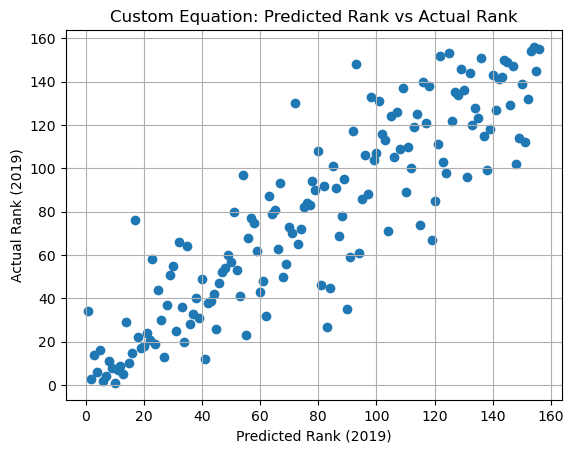

In [38]:
plt.scatter(custom19["Custom Rank"], custom19["Rank"])
plt.xlabel("Predicted Rank (2019)")
plt.ylabel("Actual Rank (2019)")
plt.title("Custom Equation: Predicted Rank vs Actual Rank")
plt.grid(True)
plt.show()

In [39]:
# checking the difference in predictions between the models
# merge on Country so the rows align

# merge linear regression and ridge regression
combined = lrp19.merge(
    rrp19[["Country", "Predicted Happiness Score", "Predicted Rank"]],
    on="Country",
    suffixes=("_LR", "_Ridge")
)
# merge knn
combined = combined.merge(knn19[["Country","Predicted Happiness Score","Predicted Rank"]], on="Country")
combined.rename(columns={"Predicted Happiness Score":"Predicted Happiness Score_KNN",
                         "Predicted Rank":"Predicted Rank_KNN"}, inplace=True)
# merge custom formula
combined = combined.merge(
    custom19[["Country", "Custom Happiness Score", "Custom Rank"]],
    on="Country"
)

# keep only the meaningful comparison columns
combined = combined[["Country","Rank","Predicted Rank_LR","Predicted Rank_Ridge","Predicted Rank_KNN","Custom Rank",
                     "Happiness Score","Predicted Happiness Score_LR","Predicted Happiness Score_Ridge","Predicted Happiness Score_KNN","Custom Happiness Score"]]

combined.head()

,Country,Rank,Predicted Rank_LR,Predicted Rank_Ridge,Predicted Rank_KNN,Custom Rank,Happiness Score,Predicted Happiness Score_LR,Predicted Happiness Score_Ridge,Predicted Happiness Score_KNN,Custom Happiness Score
0,Finland,1,11.0,7.0,3.0,10.0,7.769,7.086500,6.670654,7.328126,7.403233
1,Denmark,2,4.0,3.0,2.0,6.0,7.600,7.198562,6.741164,7.361534,7.483577
2,Norway,3,2.0,2.0,4.0,2.0,7.554,7.321012,6.790623,7.303396,7.625844
3,Iceland,4,13.0,13.0,5.0,7.0,7.494,7.059966,6.556590,7.160753,7.413258
4,Netherlands,5,12.0,12.0,10.0,13.0,7.488,7.073638,6.609798,7.019926,7.376074


I used mean absolute error and Spearman rank correlation to measure the performance of the models because they show two different sides of how well the model works. Mean absolute error tells me, on average, how far the predicted ranks are from the real ranks, so it focuses on the size of the mistakes. Spearman rank correlation looks only at whether the order of the predictions matches the order of the actual results. Using both gives a straightforward way to see how accurate the predictions are and whether the overall ranking is still correct.

In [40]:
# Compare your rankings to the original rankings in “2019.csv”. How does each model perform?

# actual calculations for how the models perform

# We use both mean absolute error and spearman rank correlation
# the best model should minimize mean absolute error and maximize spearman rank

# helper function to calculate mean square error and spearman rank correlation
def evaluate(true, pred):
  # mean absolute error is the mean of the absolute value of the difference between 2 values
  mae = np.mean(np.abs(true - pred))
  # call spearman rank function. we only want the correlation coefficient from the returned values
  corr, _ = spearmanr(true, pred)
  return mae, corr

results = {}

# find mean absolute error and spearman rank for every model
results["Linear Regression"] = evaluate(combined["Rank"], combined["Predicted Rank_LR"])
results["Ridge Regression"] = evaluate(combined["Rank"], combined["Predicted Rank_Ridge"])
results["KNN Regression"] = evaluate(combined["Rank"], combined["Predicted Rank_KNN"])
results["Custom Formula"] = evaluate(combined["Rank"], combined["Custom Rank"])

# for printing
res = pd.DataFrame(results, index=["MAE", "Spearman"]).T
# round to 4 decimals and display data
res.round(4)

,MAE,Spearman
Linear Regression,15.7051,0.8910
Ridge Regression,15.3718,0.8935
KNN Regression,14.9872,0.9046
Custom Formula,15.4359,0.8937


KNN gave the best overall results. It had both the lowest average ranking error and the highest Spearman rank correlation. This means it not only predicted the happiness scores more accurately but also preserved the overall ordering of countries better than the other models. Ridge Regression performed slightly behind KNN. Linear Regression ended up being the weakest of the three models.

What is interesting is that my custom formula also did very well. Its Spearman rank correlation is in second place, slightly above Ridge Regression. In addition, its mean absolute error was higher than Linear Regression, which is surprising for a simple weighted formula.